# PS.5 (Banach's Fixed Point Theorem)

Given $\Phi:[0,1]\rightarrow \mathbb{R}$ with $\Phi(x)=\frac{1}{3}x^2+\frac{1}{2}$, consider the iterative scheme 

$$
x_{k+1}:=\Phi(x_k).
$$

Prove that the sequence $(x_k)_{k\in\mathbb{N}}$ linearly converges for all $x_0\in[0,1]$.

# PS.5 (Banach's Fixed Point Theorem)

Consider the informal expression 

\begin{equation*}
\sqrt{2+\sqrt{2+\sqrt{2+\sqrt{\ldots}}}}
\end{equation*}



a) Rewrite the above expression as an iterative scheme $x_{k+1}=...$.

$x_{k+1} = \sqrt{2 + \sqrt{x_k}}$

b) What is the value of the above expression and what are the convergence properties of the iterative scheme?

In [91]:
x = 2
for k in 1:100
    x = sqrt(2 + sqrt(x))
end
x

1.831177207208337

Evaluating the iterative scheme in a) for any $x_0 \in \mathbb{R}$ yields $x = 1.831177207208337$

The convergence order is defined as
\begin{align*}
&||x_{k+1} - x|| \leq c||x_k - x||^r \quad \forall k \geq k_0 \\
\\
&\Rightarrow \exists r:\frac{||x_{k+1} - x||}{||x_k - x||^r} = 1
\end{align*}

In [98]:
x_old = 2
for k in 1:20
    x_new = sqrt(2 + sqrt(x_old))
    v = abs(x_new - 1.831177207208337)/abs(x_old - 1.831177207208337)^k
    println(abs(x_new - 1.831177207208337), " ", abs(x_old - 1.831177207208337), " ", x_new, " ", v, " ", k)
    x_old = x_new
end

0.01658185781423649 0.168822792791663 1.8477590650225735 0.09822049226907087 1
0.0016683992668251602 0.01658185781423649 1.8328456064751621 6.067832959267931 2
0.00016827732321678113 0.0016683992668251602 1.8313454845315538 36234.779606148564 3
1.6976886785702305e-5 0.00016827732321678113 1.8311941840951227 2.1171697106552647e10 4
1.7127788456416937e-6 1.6976886785702305e-5 1.8311789199871826 1.2145377780693432e18 5
1.7280074704473236e-7 1.7127788456416937e-6 1.831177380009084 6.844439252993162e27 6
1.743371935702953e-8 1.7280074704473236e-7 1.8311772246420563 3.789402531129845e39 7
1.7588730472084535e-9 1.743371935702953e-8 1.83117720896721 2.0611713129905857e53 8
1.7745116487333235e-10 1.7588730472084535e-9 1.8311772073857882 1.1014591873706088e69 9
1.79027903612905e-11 1.7745116487333235e-10 1.8311772072262398 5.78272021151394e86 10
1.8061108164602047e-12 1.79027903612905e-11 1.831177207210143 2.9827469175818316e106 11
1.8207657603852567e-13 1.8061108164602047e-12 1.831177207208519 

Based on this result the convergence order of $x_{k+1} = \sqrt{2 + \sqrt{x_k}}$ is 17.

c) Illustrate the convergence order numerically in julia by plotting $|x_k-x|$ in a logarithmic scale for $k=1,\ldots,20$.

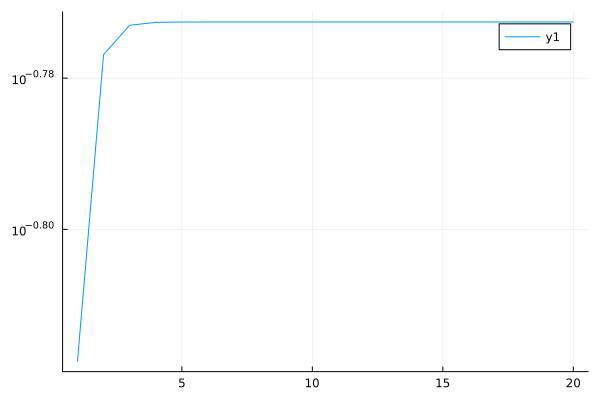

In [84]:
using Plots
x = 2
xk = zeros(21)
xk[1] = x
for k in 2:21
    xk[k] = sqrt(2 + sqrt(xk[k-1]))
end
plot(abs.(xk[2:21] .- x), yaxis=:log)

# PS.5 (diagonally dominant)

Consider the matrices
\begin{equation*}
A_1 =\begin{pmatrix}
2&0&1\\
1&2&0\\
0&1&2
\end{pmatrix},
 \qquad 
 A_2 =\begin{pmatrix}
2&0&1\\
1&1&0\\
0&1&1
\end{pmatrix},
\qquad A_3 =\begin{pmatrix}
1&0&1\\
1&1&0\\
0&1&1
\end{pmatrix}.
\end{equation*}

a) Which of these $3$ matrices is strictly diagonally dominant?
Strict diagonal dominance is defined as $|a_{ii} \gt \sum_{j \neq i}{|a_{ij}|} \forall i$. Therefore only $A_1$ is strictly diagonally dominant.

b) Investigate the convergence of Jacobi's method with respect to $A_1$, $A_2$, and $A_3$ and the right-hand-side $b=(0,0,0)^\top$ and 
the initial vector $x^{(0)}=(1,1,1)^\top$ by explicitly computing and simplifying the recursion. 


For $A_1$
\begin{align*}
x_1^{(k + 1)} &= \frac{1}{2}\left(0 - 0*x_2^{(k)} - 1*x_3^{(k)}\right) = \frac{-x_3^{(k)}}{2} \\
\\
x_2^{(k + 1)} &= \frac{1}{2}\left(0 - 1*x_1^{(k)} - 0*x_3^{(k)}\right) = \frac{-x_1^{(k)}}{2} \\
\\
x_3^{(k + 1)} &= \frac{1}{2}\left(0 - 0*x_1^{(k)} - 1*x_2^{(k)}\right) = \frac{-x_2^{(k)}}{2} \\
\\
\Rightarrow x^{(k + 1)} &= -\frac{1}{2}Px^{(k)}
\end{align*}

For $A_2$
\begin{align*}
x_1^{(k + 1)} &= \frac{1}{2}\left(0 - 0*x_2^{(k)} - 1*x_3^{(k)}\right) = \frac{-x_3^{(k)}}{2} \\
\\
x_2^{(k + 1)} &= 0 - 1*x_1^{(k)} - 0*x_3^{(k)} = -x_1^{(k)} \\
\\
x_3^{(k + 1)} &= 0 - 0*x_1^{(k)} - 1*x_2^{(k)} = -x_2^{(k)} \\
\\
\Rightarrow x^{(k + 1)} &= -1(\frac{1}{2},1,1)Px^{(k)}
\end{align*}

For $A_3$
\begin{align*}
x_1^{(k + 1)} &= 0 - 0*x_2^{(k)} - 1*x_3^{(k)} = -x_3^{(k)} \\
\\
x_2^{(k + 1)} &= 0 - 1*x_1^{(k)} - 0*x_3^{(k)} = -x_1^{(k)} \\
\\
x_3^{(k + 1)} &= 0 - 0*x_1^{(k)} - 1*x_2^{(k)} = -x_2^{(k)} \\
\\
\Rightarrow x^{(k + 1)} &= -1Px^{(k)}
\end{align*}

with $$P = \begin{pmatrix} 0&0&1\\ 1&0&0\\ 0&1&0 \end{pmatrix}$$

The three iterative schemes only differ by a scalar factor. Since all entries of $x$ for matrix $A_1$ are halfed each iteration I assume this will converge the fastest followed by the iterative scheme in $A_2$ and lastly $A_3$ which will not converge because we just flip the sign of $x$ each iteration.

In [48]:
function jacobiA1(A, x0, b, maxiter = 1000, tol = 1e-5)
    x = copy(x0)
    P = [0 0 1; 1 0 0; 0 1 0]
    for k in 1:maxiter
        if norm(A*x-b)<tol return x, k end
        x = -1/2 * P * x
    end
    return x, k
end
  
function jacobiA2(A, x0, b, maxiter = 1000, tol = 1e-5)
    x = copy(x0)
    P = [0 0 1; 1 0 0; 0 1 0]
    w = [1/2, 1, 1]
    for k in 1:maxiter
        if norm(A*x-b)<tol return x, k end
        print(w' * P * x)
        x = -1 * P * x .* w
    end
    return x, k
end

function jacobiA3(A, x0, b, maxiter = 1000, tol = 1e-5)
    x = copy(x0)
    P = [0 0 1; 1 0 0; 0 1 0]
    for k in 1:maxiter
        if norm(A*x-b)<tol return x, k end
        x = -1 * P * x
    end
    return x, maxiter
end

A1 = [2 0 1; 1 2 0; 0 1 2]
A2 = [2 0 1; 1 1 0; 0 1 1]
A3 = [1 0 1; 1 1 0; 0 1 1]
x = [1, 1, 1]
b = [0, 0, 0]
println(jacobiA1(A1, x, b))
println(jacobiA2(A2, x, b))
println(jacobiA3(A3, x, b))

([-1.9073486328125e-6, -1.9073486328125e-6, -1.9073486328125e-6], 20)
2.5-2.01.5-1.251.0-0.750.625-0.50.375-0.31250.25-0.18750.15625-0.1250.09375-0.0781250.0625-0.0468750.0390625-0.031250.0234375-0.019531250.015625-0.011718750.009765625-0.00781250.005859375-0.00488281250.00390625-0.00292968750.00244140625-0.0019531250.00146484375-0.0012207031250.0009765625-0.0007324218750.0006103515625-0.000488281250.0003662109375-0.000305175781250.000244140625-0.000183105468750.000152587890625-0.00012207031259.1552734375e-5-7.62939453125e-56.103515625e-5-4.57763671875e-53.814697265625e-5-3.0517578125e-52.288818359375e-5-1.9073486328125e-51.52587890625e-5-1.1444091796875e-59.5367431640625e-6-7.62939453125e-65.7220458984375e-6([-1.9073486328125e-6, -1.9073486328125e-6, -1.9073486328125e-6], 58)
([1, 1, 1], 1000)


# PS.5 (iterative schemes)

**Jacobi:**
\begin{align}
x^{(k+1)}_i &= \frac{1}{a_{i,i}} \left( b_i-\sum_{j\neq i}a_{i,j}x^{(k)}_j \right),\quad i=1,\ldots,n,\\
& = \frac{1}{a_{i,i}} \left( b_i-\sum_{j=1}^n a_{i,j}x^{(k)}_j\right)+x^{(k)}_i
\end{align}

**Gauss-Seidel:**
\begin{equation}
x^{(k+1)}_i = \frac{1}{a_{i,i}} \left( b_i-\sum_{j=1}^{i-1}a_{i,j}x^{(k+1)}_j  - \sum_{j=i+1}^n a_{i,j}x^{(k)}_j\right),\quad i=1,\ldots,n,
\end{equation}

a) Implement both schemes in julia as myJacobi2 and myGaussSeidel2 in-situ, i.e., without keeping all the iterates.

In [1]:
using LinearAlgebra
function myJacobi(A, b, x0; tol=1e-5, maxiter=550)      # keep all iterates
    n = size(A,1)
    x = Array{Float64,2}(undef, n, maxiter)
    x[:,1] .= x0
    for k in 1:maxiter-1
        if norm(A*x[:,k]-b)<tol return x[:,1:k] end
        for i in 1:n
            x[i,k+1] = (b[i]-A[i,:]'*x[:,k])/A[i,i]+x[i,k]
        end
    end
    return x    
end

function myJacobi2(A, b, x0; tol=1e-5, maxiter=150)    
    n = size(A,1)
    x_old = copy(x0)
    x_new = copy(x_old) 
    for k in 1:maxiter - 1
        if norm(A*x_new-b)<tol return x_new end
        for i in 1:n
            s = 0
            for j in 1:n
                if j != i s += A[i, j] * x_old[j] end
            end
            x_new[i] = 1/A[i, i] * (b[i] - s) 
        end
        x_old .= x_new
    end
    return x_new    
end

myJacobi2 (generic function with 1 method)

In [2]:
function myGaussSeidel(A, b, x0; tol=1e-5, maxiter=550)
    n = size(A,1)
    x = Array{Float64,2}(undef, n, maxiter)
    x[:,1] .= x0
    for k in 1:maxiter-1
        if norm(A*x[:,k]-b)<tol return x[:,1:k] end
        for i in 1:n
            x[i,k+1] = (b[i]-A[i,1:i-1]'*x[1:i-1,k+1]-A[i,i+1:end]'*x[i+1:end,k])/A[i,i]
        end
    end
    return x    
end

function myGaussSeidel2(A, b, x0; tol=1e-5, maxiter=150)
    n = size(A,1)
    x = copy(x0)
    for k in 1:maxiter
        if norm(A*x-b)<tol return x end
        for i in 1:n
            x[i] = 1/A[i, i] * (b[i] - sum(A[i, j] * x[j] for j in 1:(i-1); init = 0) - sum(A[i, j] * x[j] for j in (i+1):n; init = 0))
        end
    end
    return x    
end

myGaussSeidel2 (generic function with 1 method)

b) Observe the rule of thumb: Gauss-Seidel requires fewer iterations than Jacobi's method.

In [20]:
for k in 1:10
    n = 100
    A = rand(n,n)+2/3*n*I
    b = randn(n)
    x0 = zeros(n)
    X1 = myJacobi(A, b, x0;tol = 1e-8)
    X2 = myGaussSeidel(A, b, x0;tol = 1e-8)
    @show size(X1,2)
    @show size(X2,2)
    @show norm(A*X1[:,end]-b)
    @show norm(A*X2[:,end]-b);
end

size(X1, 2) = 58
size(X2, 2) = 12
norm(A * X1[:, end] - b) = 9.80714022466922e-9
norm(A * X2[:, end] - b) = 2.472469004033459e-9
size(X1, 2) = 60
size(X2, 2) = 12
norm(A * X1[:, end] - b) = 8.299678540982558e-9
norm(A * X2[:, end] - b) = 5.408787198271763e-9
size(X1, 2) = 60
size(X2, 2) = 12
norm(A * X1[:, end] - b) = 9.249819615541746e-9
norm(A * X2[:, end] - b) = 3.1505930599026917e-9
size(X1, 2) = 64
size(X2, 2) = 12
norm(A * X1[:, end] - b) = 8.71889735880181e-9
norm(A * X2[:, end] - b) = 6.6557482910170164e-9
size(X1, 2) = 61
size(X2, 2) = 11
norm(A * X1[:, end] - b) = 9.992529741951353e-9
norm(A * X2[:, end] - b) = 7.129422542085052e-9
size(X1, 2) = 51
size(X2, 2) = 12
norm(A * X1[:, end] - b) = 8.318729197339137e-9
norm(A * X2[:, end] - b) = 5.9592645028024405e-9
size(X1, 2) = 58
size(X2, 2) = 12
norm(A * X1[:, end] - b) = 8.20489581706947e-9
norm(A * X2[:, end] - b) = 2.4829491639177304e-9
size(X1, 2) = 64
size(X2, 2) = 12
norm(A * X1[:, end] - b) = 7.932628962586746e-9
norm(A 

c) Observe that the simple parallel version of Jacobi's method is indeed faster. (Before starting julia (or jupyter) type in the terminal: 

"export JULIA_NUM_THREADS=8" 

(or whatever number of cores your processor provides, 2 or 4,...))

In [3]:
Threads.nthreads()

8

In [9]:
function myJacobiParallel(A, b, x0; tol=1e-5, maxiter=50)
    d = size(A,1)
    x = Array{Float64,2}(undef, d, maxiter)
    x[:,1] = copy(x0)
    for k in 1:maxiter
        if norm(A*x[:,k]-b)<tol return x[:,1:k] end
        Threads.@threads for i = 1:d 
            x[i,k+1] = (b[i]-A[i,:]'*x[:,k])/A[i,i]+x[i,k]
        end
    end
    return x    
end

function myJacobiParallel2(A, b, x0; tol=1e-5, maxiter=50)    
    n = size(A,1)
    x_old = copy(x0)
    x_new = copy(x_old) 
    for k in 1:maxiter - 1
        if norm(A*x_new-b)<tol return x_new end
        Threads.@threads for i in 1:n
            s = 0
            for j in 1:n
                if j != i s += A[i, j] * x_old[j] end
            end
            x_new[i] = 1/A[i, i] * (b[i] - s) 
        end
        x_old .= x_new
    end
    return x_new    
end

myJacobiParallel2 (generic function with 1 method)

In [12]:
function testParallel()
    n = 1500
    x₀ = zeros(n)
    A = rand(n,n)/n
    A .= A+I
    b = randn(n)
    println("elapsed time quotient:  parallel / sequential")
    println(@elapsed[myJacobiParallel(A,b,x₀)]/@elapsed[myJacobi(A,b,x₀)])    # parallelized/sequential 
    @elapsed[myJacobiParallel2(A,b,x₀)]/@elapsed[myJacobi2(A,b,x₀)]     # parallelized/sequential 
end

testParallel()

elapsed time quotient:  parallel / sequential
0.30725102224786666


0.45651017694082113